# Systematic uncertainties - eigenvector calculation example
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
from ROOT import *
import numpy as np
from array import array
from scipy.stats import norm

# For inline image display
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


### (2) Definition of background model

Consider controlled parameter range is [0,1]

In [3]:
# True background distribution
def mybg(x):
    
    bg = 10.0 - 2* x + x*x
    
    return bg


# Basic functions:  1, x, x^2, x^3 ...

def myfun(x,ifun):

    return np.power(x,ifun)

# Full model

def mymodel(x,par):

    val = np.zeros(x.size)
    
    for ip in range(par.size):
        val+=par[ip]*myfun(x,ip)
        
    return val


### (3) Generate pseudo data to fit

In [4]:
# Considered values of x

xvec = np.linspace(0.05,0.95,10)

# Measurement precision
# Assume background is measured with precision ten time better than in the actual experiment

#  svec = np.linspace(2.,4.,xvec.size)  # used for the actual experiment

svec = np.linspace(0.2,0.4,xvec.size)

s2vec = svec*svec

# Pseudo-data

yvec = np.random.normal(mybg(xvec),svec)


### (4)  Linear fit

In [36]:
# Number of model functions to consider 

Nfun = 3

A = np.zeros((Nfun,Nfun))

B = np.zeros(Nfun)

for l in range(Nfun):
    fl = myfun(xvec,l)
    B[l] = np.sum(fl*yvec/s2vec)
    for k in range(Nfun):
        fk = myfun(xvec,k)
        A[l,k] = np.sum(fl*fk/s2vec)


In [37]:
# Inverse of matrix

Cov = np.linalg.inv(A)

# Solution to the problem

par = Cov @ B

# Parameter uncertainties

epar = np.sqrt(np.diagonal(Cov))

print("\n Fit results:\n\n     par         sigma_p\n")

for ip in range(par.size):
    print("  %8.3f  +/- %6.3f " % (par[ip],epar[ip]))

# Printout settings for (correlation matrix)

np.set_printoptions(precision=3, linewidth=100, suppress=True)

# More advanced: prevent zeros from being stripped from the end of floats
np.set_printoptions(formatter={'float_kind': '{: 0.3f}'.format})

# Calculate correlation matrix

Corr = np.array(Cov)

print("\n Correlation matrix\n")
for ip in range(par.size):
    for jp in range(par.size):
        Corr[ip,jp]=Corr[ip,jp]/epar[ip]/epar[jp]
        
    print(Corr[ip,:])

# Fitted function

fvec = mymodel(xvec,par) 

# Chi^2 printout

chi2 = np.sum((yvec-fvec)**2/s2vec)

print("\n chi^2 =  %8.3f   chi^2/Ndf = %8.5f " % (chi2,chi2/(xvec.size-Nfun)))

# print("\n  x       y        sigma_y ")
# for ix in range(xvec.size):
#      print("%6.3f  %8.5f  %8.5f " % (xvec[ix],yvec[ix],svec[ix]))



 Fit results:

     par         sigma_p

    10.276  +/-  0.214 
    -3.297  +/-  1.185 
     2.108  +/-  1.265 

 Correlation matrix

[ 1.000 -0.843  0.719]
[-0.843  1.000 -0.963]
[ 0.719 -0.963  1.000]

 chi^2 =     2.906   chi^2/Ndf =  0.41509 


### (5) Draw background data and fit

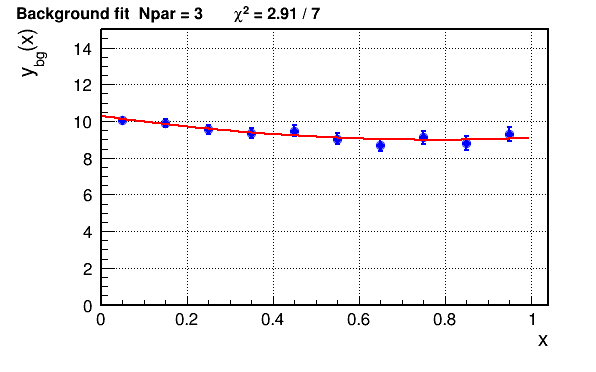

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cexp
Info in <TCanvas::Print>: png file 09_sys_fit_ev_3.png has been created


In [38]:
# Lin scale

gStyle.SetOptLogy(0)

# Create plot canvas

# gStyle.SetCanvasDefH(600)  # Default is 600 x 400

cexp = TCanvas('cexp')
   
## Pseudo-data graph

dgr=TGraphErrors(xvec.size,array('d',xvec),array('d',yvec),0,array('d',svec))
dgr.SetNameTitle('dgr','Background fit  Npar = '+str(Nfun)+'     #chi^{2} = '+str(int(100*chi2+0.5)/100.)+' / '+str(xvec.size-Nfun))
    
# Graphic style

dgr.GetXaxis().SetTitle("x")
dgr.GetYaxis().SetTitle("y_{bg}(x)")
dgr.SetMarkerStyle(20)
dgr.SetMarkerSize(1.0)
dgr.SetMarkerColor(4)
dgr.SetLineColor(4)
dgr.SetLineWidth(2)
dgr.SetLineStyle(1)
dgr.SetMinimum(0.)   
dgr.SetMaximum(15.)   
dgr.Draw('AWP')

# Fitted dependence wraper for root

def myfit(x, par):
    
    val = 0
    
    for ip in range(Nfun):
        val+=par[ip]*myfun(x[0],ip)
        
    return val

# Define user function

fexp=TF1("fexp",myfit,-1.,1.,Nfun)

for ip in range(Nfun):
    fexp.SetParameter(ip,par[ip])
    
fexp.SetNpx(100)
fexp.SetLineStyle(1)
fexp.SetLineColor(2)

fexp.DrawCopy("Lsame")

cexp.Update()
fname = '09_sys_fit_ev_'+str(Nfun)+'.png'
cexp.Print(fname)

Image(filename=fname)

### (6) Expected background covariance matrix

In [39]:
# Expected bacground values

muvec = mymodel(xvec,par) 

# Matrix of derivatives   $\partial \mu_i / \partial p_j$

Der = np.zeros((xvec.size,Nfun))

for ip in range(Nfun):
    Der[:,ip] = np.power(xvec,ip)

# Error propagation -> expectation covariance matrix

muCov = Der @ Cov @ np.transpose(Der)

# Background erros

muErr = np.sqrt(np.diagonal(muCov))

# Printout

print("\n Fitted background:\n\n     x        mu_bg      sigma_bg\n")

for ix in range(xvec.size):
    print("  %8.3f %8.3f  +/- %6.3f " % (xvec[ix],muvec[ix],muErr[ix]))

# Calculate correlation matrix

muCorr = np.array(muCov)

print("\n Correlation matrix\n")

for ix in range(xvec.size):
    for jx in range(xvec.size):
        muCorr[ix,jx]=muCorr[ix,jx]/muErr[ix]/muErr[jx]
        
    print(muCorr[ix,:])




 Fitted background:

     x        mu_bg      sigma_bg

     0.050   10.117  +/-  0.169 
     0.150    9.829  +/-  0.114 
     0.250    9.584  +/-  0.110 
     0.350    9.381  +/-  0.127 
     0.450    9.219  +/-  0.138 
     0.550    9.100  +/-  0.139 
     0.650    9.024  +/-  0.136 
     0.750    8.989  +/-  0.149 
     0.850    8.996  +/-  0.201 
     0.950    9.046  +/-  0.294 

 Correlation matrix

[ 1.000  0.847  0.360 -0.021 -0.217 -0.306 -0.293 -0.149  0.051  0.197]
[ 0.847  1.000  0.800  0.506  0.309  0.172  0.054 -0.044 -0.090 -0.092]
[ 0.360  0.800  1.000  0.921  0.805  0.675  0.473  0.152 -0.153 -0.328]
[-0.021  0.506  0.921  1.000  0.970  0.887  0.694  0.316 -0.089 -0.344]
[-0.217  0.309  0.805  0.970  1.000  0.969  0.824  0.470  0.048 -0.237]
[-0.306  0.172  0.675  0.887  0.969  1.000  0.935  0.660  0.266 -0.028]
[-0.293  0.054  0.473  0.694  0.824  0.935  1.000  0.882  0.585  0.319]
[-0.149 -0.044  0.152  0.316  0.470  0.660  0.882  1.000  0.898  0.727]
[ 0.051 -0.090 

### (7) Eigenvectors

In [40]:
# Calculate eigenvalues and eigenvectors of square matrix

Lam0, muEVec0 = np.linalg.eig(muCorr)

# sort eigenvalues

isL = np.argsort(Lam0)[::-1]

# Take only real part. Imaginary part is due to numerical precision.

Lam=np.real(Lam0[isL])

muEVec = np.real(muEVec0[:,isL])

# Scale relevant eigenvectors to 1 sigma variations
#
# Square roots of eigenvalues give uncertainties along eigenvector directions
# still to be multiplied by uncertainties of individual estimates...

EVerr = np.zeros(Lam.size)
nEV = 0

for iv in range(Lam.size):

    if Lam[iv]<=0.01: break
    nEV += 1

    EVerr[iv]=sqrt(Lam[iv])
    
    for ix in range(muvec.size):
        muEVec[ix,iv] *= muErr[ix]*EVerr[iv]
       

# Printout
# Square roots of eigenvalues give uncertainties along eigenvector directions
# (still to be multiplied by uncertainties of individual estimates)

for iv in range(nEV):
    print("\n Uncertainty (relative %8.5f) along direction %d: " % (EVerr[iv],iv+1))
    print(muEVec[:,iv])



 Uncertainty (relative  2.20319) along direction 1: 
[ 0.011 -0.044 -0.086 -0.115 -0.131 -0.134 -0.125 -0.102 -0.067 -0.018]

 Uncertainty (relative  1.76440) along direction 2: 
[ 0.049  0.062  0.063  0.052  0.030 -0.004 -0.050 -0.108 -0.177 -0.257]

 Uncertainty (relative  1.42577) along direction 3: 
[ 0.161  0.086  0.028 -0.011 -0.031 -0.034 -0.018  0.017  0.070  0.141]


In [41]:
# Check uncertainties resulting from eigenvectors

muErrEV = np.zeros(muvec.size)
muCovEV = np.zeros((muvec.size,muvec.size))

for iv in range(nEV):
    muErrEV = muErrEV + muEVec[:,iv]*muEVec[:,iv]
    
muErrEV = np.sqrt(muErrEV)

# Covariance matrix

for ix in range(muvec.size):
    for jx in range(muvec.size):
        for iv in range(nEV):
            muCovEV[ix,jx] = muCovEV[ix,jx] + muEVec[ix,iv]*muEVec[jx,iv]
                
# Printout

print("\n Fitted background:\n\n     x        mu_bg      sigma_bg    sigma_EV\n")

for ix in range(xvec.size):
    print("  %8.3f %8.3f  +/- %6.3f      %6.3f" % (xvec[ix],muvec[ix],muErr[ix],muErrEV[ix]))


muCorrEV = np.array(muCovEV)

print("\n Correlation matrix from eigenvectors\n")

for ix in range(xvec.size):
    for jx in range(xvec.size):
        muCorrEV[ix,jx]=muCorrEV[ix,jx]/muErrEV[ix]/muErrEV[jx]

    print(muCorrEV[ix,:])

# For comparison

print("\n Correlation matrix from the fit \n")
for ix in range(xvec.size):
    print(muCorr[ix,:])




 Fitted background:

     x        mu_bg      sigma_bg    sigma_EV

     0.050   10.117  +/-  0.169       0.169
     0.150    9.829  +/-  0.114       0.114
     0.250    9.584  +/-  0.110       0.110
     0.350    9.381  +/-  0.127       0.127
     0.450    9.219  +/-  0.138       0.138
     0.550    9.100  +/-  0.139       0.139
     0.650    9.024  +/-  0.136       0.136
     0.750    8.989  +/-  0.149       0.149
     0.850    8.996  +/-  0.201       0.201
     0.950    9.046  +/-  0.294       0.294

 Correlation matrix from eigenvectors

[ 1.000  0.847  0.360 -0.021 -0.217 -0.306 -0.293 -0.149  0.051  0.197]
[ 0.847  1.000  0.800  0.506  0.309  0.172  0.054 -0.044 -0.090 -0.092]
[ 0.360  0.800  1.000  0.921  0.805  0.675  0.473  0.152 -0.153 -0.328]
[-0.021  0.506  0.921  1.000  0.970  0.887  0.694  0.316 -0.089 -0.344]
[-0.217  0.309  0.805  0.970  1.000  0.969  0.824  0.470  0.048 -0.237]
[-0.306  0.172  0.675  0.887  0.969  1.000  0.935  0.660  0.266 -0.028]
[-0.293  0.054  0.4